<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_jan_2019 = pd.read_parquet('Data/yellow_tripdata_2019-01.parquet')
taxi_df = pd.concat([taxi_jan_2019])                               

In [5]:
print(taxi_df.shape)
taxi_df.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [8]:
#checking columns
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [10]:
taxi_df = taxi_df[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

In [12]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

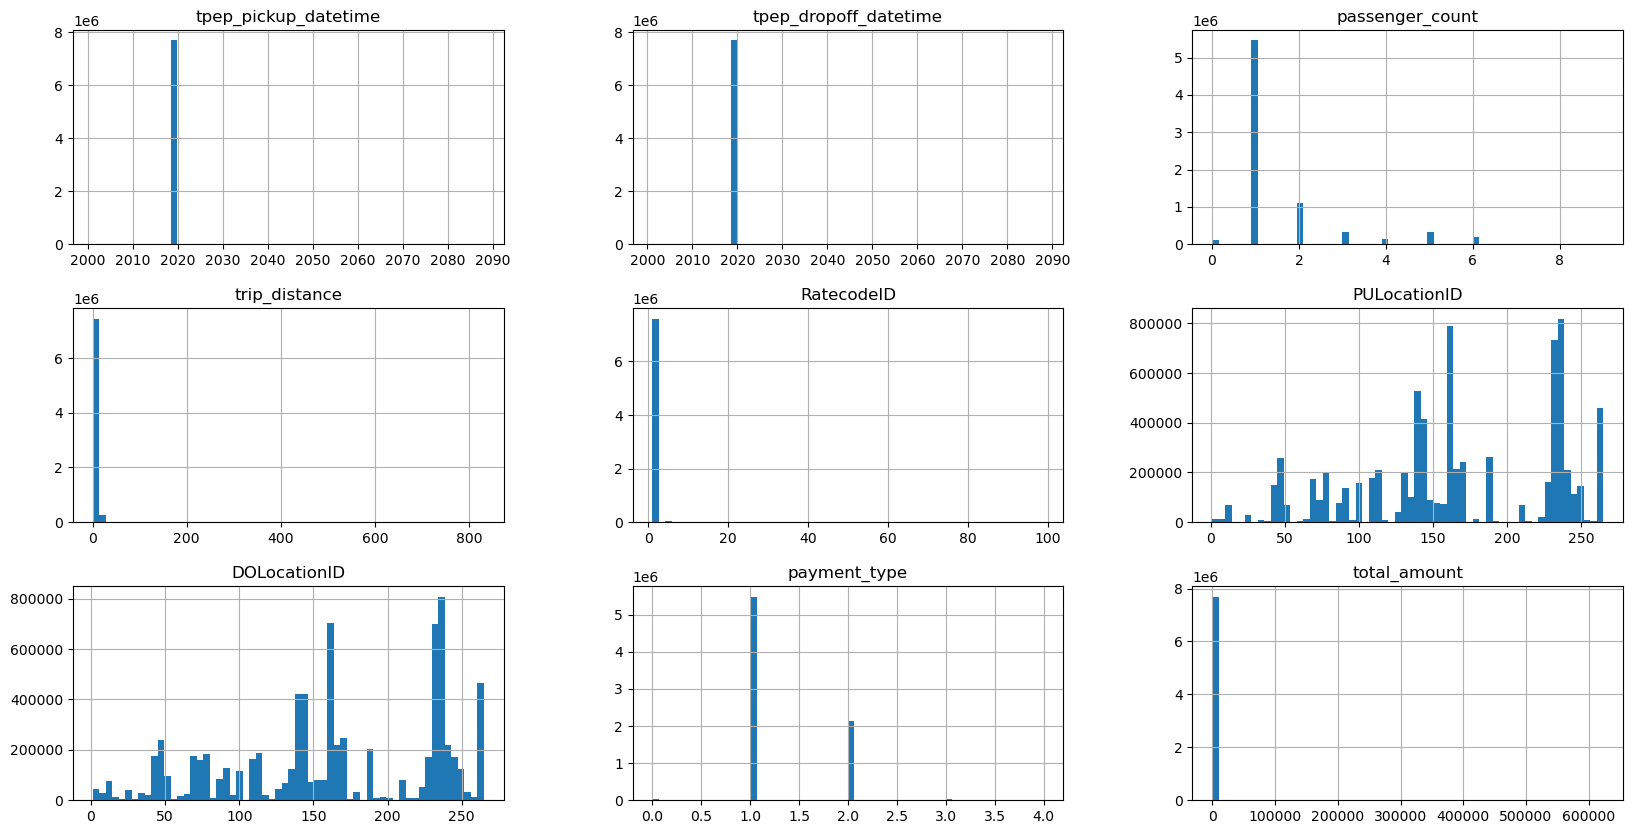

In [14]:
taxi_df.hist(figsize=(20,10), bins=60)

<Axes: xlabel='index', ylabel='total_amount'>

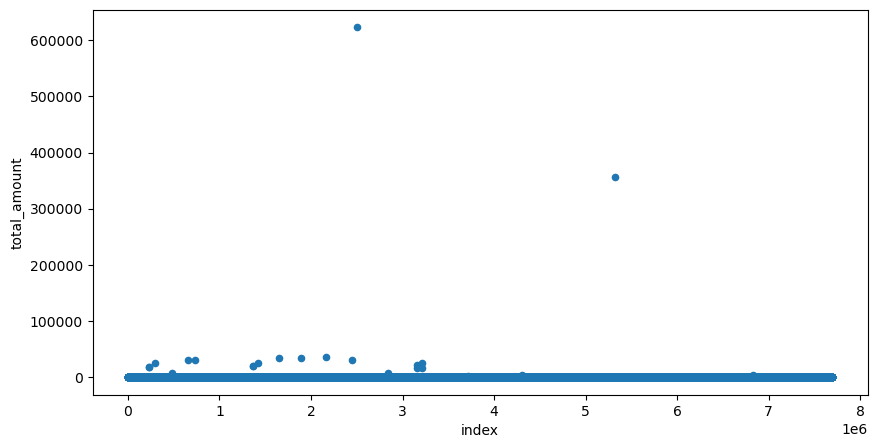

In [29]:
#plotting all the values in data set for total amount to understand the histogram plot
taxi_df.reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

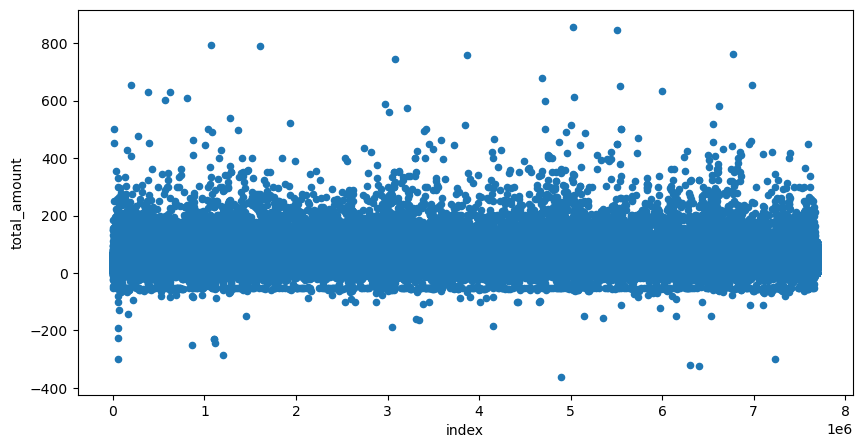

In [17]:
#plotting all the values less than a thousand to understand better
taxi_df[taxi_df['total_amount'] <1000].reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

In [19]:
#there are some negative values present and outliers, hence the reason for anomally in hist plot

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

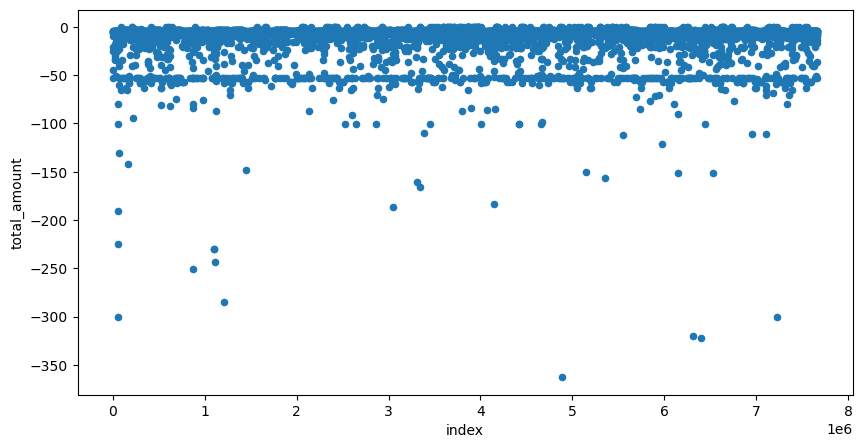

In [21]:
print(taxi_df[taxi_df['total_amount'] < 0].shape)
taxi_df[taxi_df['total_amount']< 0].reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

In comparison with the total amount of data set points, there are less data hence can be deleted and will not affect the data

In [23]:
taxi_df[taxi_df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [25]:
taxi_df[taxi_df['total_amount']< 0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

Negative values of the total amount mainly indicate that there was an issue either dispute over the fare or there was no charge. Hence explaining the presence of them. decision to delete them would be valid.

<Axes: >

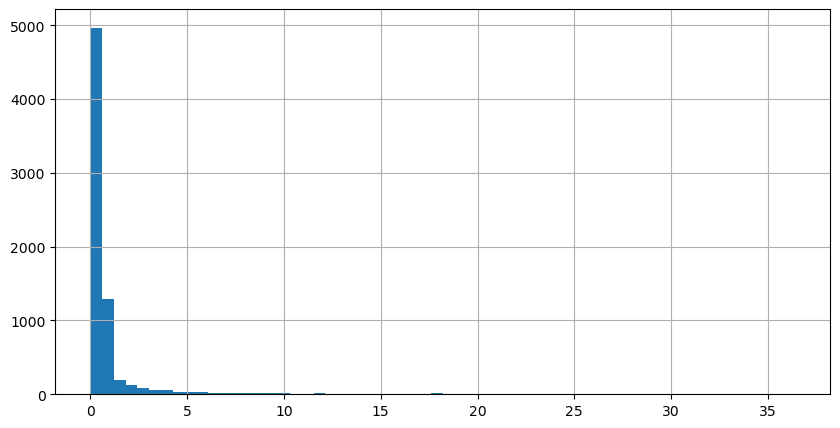

In [31]:
#check the value of trip distance when total amount is 0
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [33]:
#analysis of why someone would pay zero dollars for a cab
print(taxi_df[taxi_df['total_amount']==0].shape)
taxi_df[taxi_df['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


<Axes: >

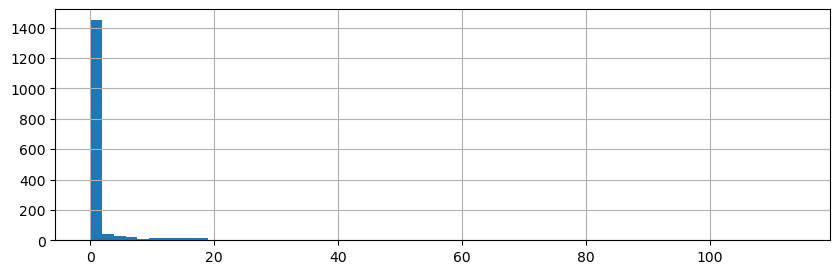

In [35]:
#checking the trip distance for when the total amount is 0 
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,3))

Since most of the trip distance values are 0 it means tese values are not necessary for analysis hence , can easily get rid of them

<Axes: xlabel='index', ylabel='total_amount'>

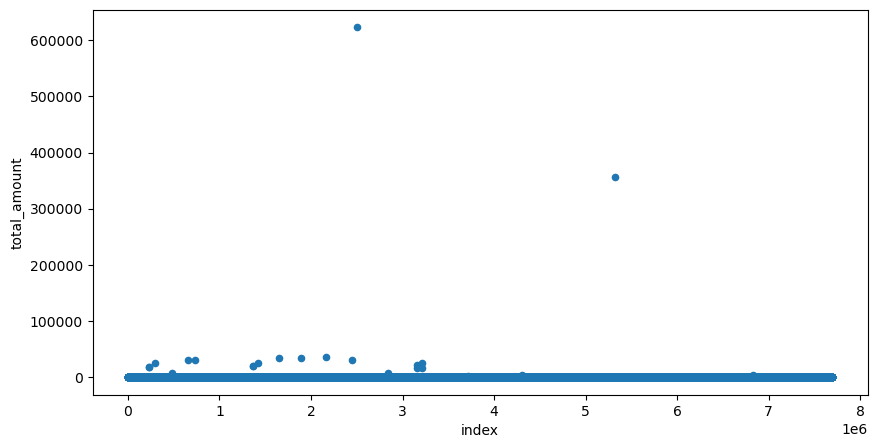

In [38]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount',x='index', figsize=(10,5))

In [40]:
#checking total of high values
taxi_df[taxi_df['total_amount']>500].shape


(56, 9)

In [44]:
taxi_df[taxi_df['total_amount']>200].shape
taxi_df['total_amount'].mean()

15.810651344610214

Cut off will be at $200 reasonable high value for analysis

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [72]:
#Removing rows with negative values
taxi_df_filtered = taxi_df[(taxi_df['total_amount']>0)&(taxi_df['total_amount']<200)]
taxi_df_filtered.shape

(7686676, 9)

Checking for missing values

In [70]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [78]:
#dropping missing values
taxi_df_filtered = taxi_df_filtered.dropna()

In [80]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [84]:
taxi_df_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)